In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ls -lh data

total 571904
-rw-r--r--  1 gverploeg  staff   239M Aug  2  2016 data.json
-rw-r--r--  1 gverploeg  staff    33M Dec 17 17:44 data.zip
-rw-r--r--  1 gverploeg  staff   1.5M Dec 17 17:44 final_columns.csv
-rw-r--r--@ 1 gverploeg  staff   533K Dec 17 18:03 fraud_data.csv


In [9]:
!wc data/data.json

       0 8173151 250481668 data/data.json


In [10]:
%%writefile subset_json.py
"""head_json.py - extract a couple records from a huge json file.

Syntax: python head_json.py < infile.json > outfile.json
"""

import sys

start_char = '{'
stop_char = '}'
n_records = 100
level_nesting = 0

while n_records != 0:
    ch = sys.stdin.read(1)
    sys.stdout.write(ch)
    if ch == start_char:
        level_nesting += 1
    if ch == stop_char:
        level_nesting -= 1
        if level_nesting == 0:
            n_records -= 1
sys.stdout.write(']')


Overwriting subset_json.py


In [11]:
!python subset_json.py < data/data.json > data/subset.json

In [12]:
import pandas as pd

df = pd.read_json('data/subset.json')

In [13]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [8]:
df.head().T

,0,1,2,3,4
acct_type,fraudster_event,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800
body_length,3852,3499,2601,12347,2417
channels,5,0,8,6,11
country,US,US,US,IE,US
currency,USD,USD,USD,EUR,USD
delivery_method,0,1,1,1,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666


In [9]:
df['acct_type'].value_counts(dropna=False)

premium             90
spammer_warn         3
fraudster            3
fraudster_event      2
spammer_noinvite     1
spammer_limited      1
Name: acct_type, dtype: int64

In [10]:
df['venue_country'].value_counts(dropna=False)

US     70
GB      9
NaN     7
CA      6
        6
FR      1
AU      1
Name: venue_country, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           100 non-null    object 
 1   approx_payout_date  100 non-null    int64  
 2   body_length         100 non-null    int64  
 3   channels            100 non-null    int64  
 4   country             100 non-null    object 
 5   currency            100 non-null    object 
 6   delivery_method     100 non-null    int64  
 7   description         100 non-null    object 
 8   email_domain        100 non-null    object 
 9   event_created       100 non-null    int64  
 10  event_end           100 non-null    int64  
 11  event_published     100 non-null    int64  
 12  event_start         100 non-null    int64  
 13  fb_published        100 non-null    int64  
 14  gts                 100 non-null    float64
 15  has_analytics       100 non-null    int64  
 16  has_heade

In [12]:
df['org_desc'].head()

0                                                     
1    <p>Since 1987, RUF has ministered to students ...
2    <p><a href="http://www.desiredresults.com">www...
3                                                     
4    <p><font face="Arial"><font size="2"><strong>T...
Name: org_desc, dtype: object

In [13]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [14]:
df_full = pd.read_json('data/data.json')

In [170]:
# df_full['acct_type'].value_counts(dropna=False)

### EDA on Body text

In [16]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html
import string


In [17]:
df_full.shape

(14337, 44)

In [18]:
df_full['Description_string']=df_full.apply(lambda x: BeautifulSoup(x['description']).get_text().replace('\n',' '),axis=1)

df_full['org_desc_string']=df_full.apply(lambda x: BeautifulSoup(x['org_desc']).get_text().replace('\n',' '),axis=1)



/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:424: MarkupResemblesLocatorWarning: "http://montreal.shambhala.org/2011_2012/program/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [19]:
df_full['Description_string']= df_full['Description_string'].str.replace('[{}]'.format(string.punctuation), '')

df_full['org_desc']= df_full['org_desc'].str.replace('[{}]'.format(string.punctuation), '')




In [20]:
df_full['Label'] = np.where(df_full['acct_type'].str.contains('fraud'), 1, 0)

In [176]:
df_full.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Description_string,org_desc_string,Label
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.ph...",gmail.com,1262739706,...,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,Party Starz Entertaintm...,,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, on...",ruf.org,1293832670,...,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,Join us for a quick onenig...,"Since 1987, RUF has minist...",0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcatego...",pvsd.k12.ca.us,1291090956,...,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office ...,CA,Teacher Training on the De...,www.desiredresults.us,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1...",irishtabletennis.com,1360681570,...,3,,None,NaN,NaN,None,None,Affiliations are now due i...,,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers ...,artsandbusinesscouncil.org,1291994666,...,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,Writers and filmmakers nee...,The Arts & Business Counci...,0


In [21]:
fraud = df_full[df_full['Label'] == 1]
nonfraud = df_full[df_full['Label'] == 0]

In [178]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
#                              analyzer='word', max_df=1.0, min_df=1,
#                              max_features=None)
# count_vect.fit(twenty_train.data)

In [179]:
# from collections import Counter
# Counter(" ".join(fraud["Description_string"]).split()).most_common(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gverploeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         Frequency
Word              
event          385
tickets        303
one            276
party          264
us             255
new            249
•              240
help           239
time           224
course         223


<AxesSubplot:xlabel='Word'>

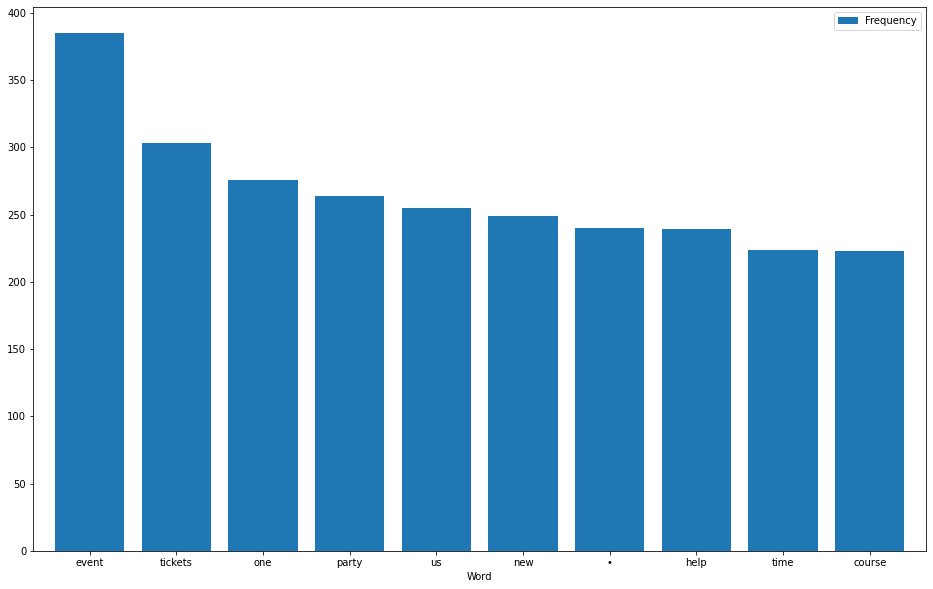

In [180]:
from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])
# newStopWords = ('-',"'", '&', ',')
# for i in newStopWords:
#     stopwords.append(i)

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (fraud.Description_string
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gverploeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          Frequency
Word               
event          8468
please         6136
new            6038
business       5885
us             5719
one            4979
tickets        4807
time           4711
–              4007
pm             3873


<AxesSubplot:xlabel='Word'>

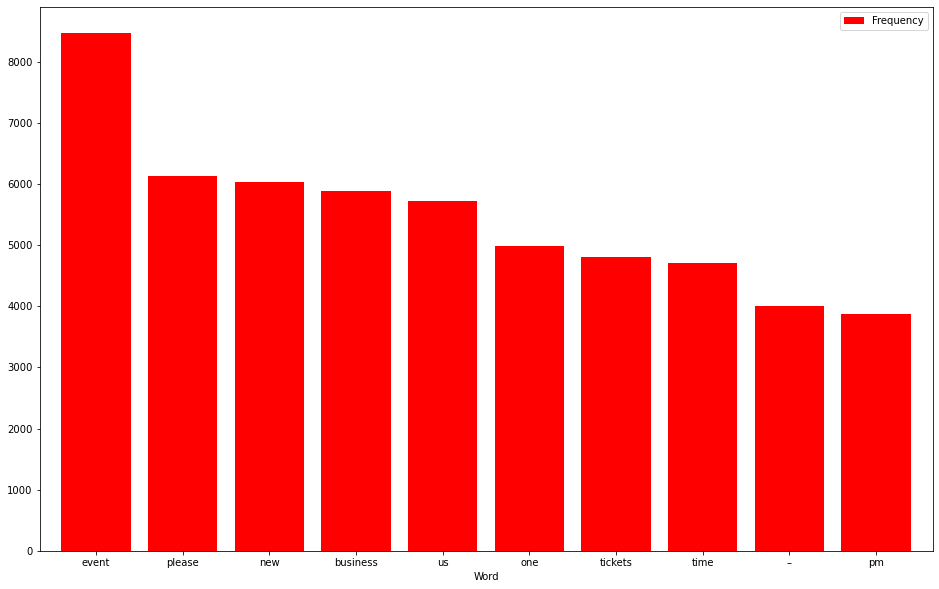

In [181]:
#  Plot most common Non-Fraud words

from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])


# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (nonfraud.Description_string
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8, color='r')


### Examine Rows that contain 'de', 'et', 'la' string for Fraud items

In [22]:
fraud_exam = fraud[fraud['Description_string'].str.contains(" de ")] 

pd.set_option('display.max_colwidth', 100)
fraud_exam[['description', 'venue_country', 'org_desc', 'Description_string', 'Label']].head(10)



,description,venue_country,org_desc,Description_string,Label
487,<p>Curso de posgrado para la mejora de la administracion de la economia hogare&ntilde;a</p>,AR,pDescripcion de los principales lineamientos de las actividades del hogar herramientas e tener e...,Curso de posgrado para la mejora de la administracion de la economia hogareña,1
860,<!--[if gte mso 9]><xml>\r\n <w:WordDocument>\r\n <w:View>Normal</w:View>\r\n <w:Zoom>0</w:Zoo...,IT,,Après les moments merveilleux passés à Barcelone et à Londres nous voici à létape de ROME R...,1
873,<!--[if gte mso 9]><xml>\r\n <w:WordDocument>\r\n <w:View>Normal</w:View>\r\n <w:Zoom>0</w:Zoo...,None,,Bonjour Comme prevu cette page a été cree envue de permettre aux retardataires dacheter...,1
958,<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</p>\r\n<p>&nbsp;</...,MA,,Le célèbre L’Boulevard Festival deCasablanca a été annulé pour la deuxième année c...,1
1429,"<p>&nbsp;</p>\r\n<p><img style=""-webkit-user-select: none;"" src=""https://fbcdn-sphotos-c-a.akama...",MA,,Considéré aujourd’hui comme l’un des festivals les plus importants du pays le festival Timita...,1
1529,<p><strong>In the Garden of Sounds (nel giardino dei suoni)<br /></strong>Nicola Bellucci | Ital...,GB,pa hrefhttpwwwlidfcoukLIDFa is the UKs largest dpocumentary film festival It brings together div...,In the Garden of Sounds nel giardino dei suoniNicola Bellucci Italy 2010 85minUK PremiereA to...,1
1886,<p>salut;</p>\r\n<p> </p>\r\n<p>Comme vous le savez les eleves du Collège Don Bosco de Nice effe...,FR,,salut Comme vous le savez les eleves du Collège Don Bosco de Nice effectuent une visite ce Sam...,1
1985,"<p>le&nbsp;</p>\r\n<div id=""txtContent"" style=""margin: 0px; padding: 16px 0px 12px; font-size: 1...",MA,p stylemargin 0px padding 0px clear both color 1f1f1f fontfamily Arial Helvetica sansserif fonts...,le Ministère de la Culture organise la deuxième édition des « Carrefours Régionaux de Jeunes...,1
1990,"<p><span style=""color: #262626; font-family: Verdana, Geneva, sans-serif; font-size: 13px; backg...",FR,pspan stylecolor 262626 fontfamily Verdana Geneva sansserif fontsize 13px backgroundcolor 4891cf...,L’Union Amicale Pétanque Aigrefeuillaise organise un concours de pétanque le samedi 7 septembre ...,1
2453,"<p><img class=""photo"" alt="""" />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &...",MA,,Le célèbre groupe a été fondé en 1996 sous l’impulsion de Youcef Boukella ...,1


#### The 'de', 'et', 'la' are shown heavily in foreign lang descriptions. For example, 'et' is and in French

### Look at country breakdowns of fraud vs non-fraud

In [23]:
fraud['venue_country'].value_counts(dropna=False)

US     469
NaN    370
GB     223
        99
CA      19
MA      18
PH      15
FR      14
AU      10
DE       8
VN       6
ID       6
AR       4
AE       3
KE       3
PK       3
NL       2
ZA       2
TR       2
NA       2
JE       1
HR       1
NG       1
IT       1
OM       1
CO       1
RU       1
SE       1
TH       1
CY       1
DK       1
MX       1
CM       1
KH       1
DZ       1
Name: venue_country, dtype: int64

In [24]:
nonfraud['venue_country'].value_counts(dropna=False)

US     7867
GB     1615
CA     1115
        777
NaN     706
AU      673
NZ       50
IE       44
FR       38
NL       28
DE       28
ES       20
BE       15
PR        5
AR        5
AT        4
BS        3
PL        3
ID        3
HU        3
SG        3
TH        2
NI        2
PT        2
ZA        2
AE        2
IN        2
CN        2
FI        1
JM        1
MC        1
SE        1
IL        1
CZ        1
SK        1
JP        1
HT        1
TT        1
LU        1
NO        1
HK        1
BG        1
UY        1
DO        1
QA        1
MY        1
RE        1
IS        1
MX        1
TR        1
VI        1
HR        1
BR        1
Name: venue_country, dtype: int64

### Look at key words of org_desc of fraud v non-fraud

In [185]:
# Top words for org_desc on Fraud

from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])
# newStopWords = ('-',"'", '&', ',')
# for i in newStopWords:
#     stopwords.append(i)

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (fraud.org_desc
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gverploeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


             Frequency
Word                  
0px               1409
fontsize           521
initial            471
padding            398
p                  363
stylemargin        343
fontfamily         335
lineheight         327
arial              306
sansserif          295


In [186]:
# Top words for org_desc on non-fraud

from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])
# newStopWords = ('-',"'", '&', ',')
# for i in newStopWords:
#     stopwords.append(i)

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (nonfraud.org_desc
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gverploeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                     Frequency
Word                          
p                        10279
fontsize                  7538
lockedfalse               7267
wlsdexception             7266
0px                       6814
unhidewhenusedfalse       6148
semihiddenfalse           6042
fontfamily                5962
stylefontsize             5933
stylefontfamily           5237


In [187]:
fraud['email_domain'].value_counts(dropna=False)

gmail.com                 345
yahoo.com                 284
hotmail.com               101
ymail.com                  44
aol.com                    40
                         ... 
DionJordan.com              1
msn.com                     1
leisurelodgebaguio.com      1
medicalrepinsight.com       1
frontier.com                1
Name: email_domain, Length: 134, dtype: int64

In [188]:
nonfraud['email_domain'].value_counts(dropna=False)

gmail.com                 2752
yahoo.com                  508
hotmail.com                298
aol.com                    158
me.com                      71
                          ... 
homeofyoga.com               1
slcsem.org                   1
vimcasts.org                 1
ameq.org                     1
sunnyhillsservices.org       1
Name: email_domain, Length: 5667, dtype: int64

In [25]:
df_full.shape

(14337, 47)

### Ticket Types - word analysis

In [26]:
df_full.isnull().sum(axis = 0)

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [27]:
# df_full.sort_values(len('ticket_types'))

In [28]:
pd.set_option('display.max_colwidth', 3000)

df_full[['ticket_types', 'Label']].head(15)

,ticket_types,Label
0,"[{'event_id': 527017, 'cost': 25.0, 'availability': 1, 'quantity_total': 800, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 50.0, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 0}, {'event_id': 527017, 'cost': 550.0, 'availability': 1, 'quantity_total': 20, 'quantity_sold': 0}]",1
1,"[{'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 22}, {'event_id': 786878, 'cost': 35.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 3}]",0
2,"[{'event_id': 787337, 'cost': 93.51, 'availability': 1, 'quantity_total': 48, 'quantity_sold': 48}]",0
3,"[{'event_id': 885645, 'cost': 25.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 10}, {'event_id': 885645, 'cost': 15.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 23}, {'event_id': 885645, 'cost': 10.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 8}, {'event_id': 885645, 'cost': 5.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 12}, {'event_id': 885645, 'cost': 15.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 0}, {'event_id': 885645, 'cost': 12.0, 'availability': 1, 'quantity_total': 5000, 'quantity_sold': 5}]",0
4,"[{'event_id': 1114349, 'cost': 150.0, 'availability': 1, 'quantity_total': 16, 'quantity_sold': 2}, {'event_id': 1114349, 'cost': 45.0, 'availability': 1, 'quantity_total': 16, 'quantity_sold': 15}, {'event_id': 1114349, 'cost': 125.0, 'availability': 1, 'quantity_total': 16, 'quantity_sold': 0}, {'event_id': 1114349, 'cost': 36.0, 'availability': 1, 'quantity_total': 16, 'quantity_sold': 1}, {'event_id': 1114349, 'cost': 200.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 1}, {'event_id': 1114349, 'cost': 150.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 0}, {'event_id': 1114349, 'cost': 60.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 19}, {'event_id': 1114349, 'cost': 48.0, 'availability': 1, 'quantity_total': 50, 'quantity_sold': 1}]",0
5,"[{'event_id': 1179983, 'cost': 8.0, 'availability': 1, 'quantity_total': 1000, 'quantity_sold': 13}, {'event_id': 1179983, 'cost': 5.0, 'availability': 1, 'quantity_total': 200, 'quantity_sold': 4}, {'event_id': 1179983, 'cost': 14.0, 'availability': 1, 'quantity_total': 145, 'quantity_sold': 16}, {'event_id': 1179983, 'cost': 20.0, 'availability': 1, 'quantity_total': 60, 'quantity_sold': 4}]",0
6,"[{'event_id': 1180179, 'cost': 22.63, 'availability': 1, 'quantity_total': 75, 'quantity_sold': 28}, {'event_id': 1180179, 'cost': 30.0, 'availability': 1, 'quantity_total': 60, 'quantity_sold': 3}, {'event_id': 1180179, 'cost': 475.05, 'availability': 1, 'quantity_total': 10, 'quantity_sold': 0}, {'event_id': 1180179, 'cost': 117.13, 'availability': 1, 'quantity_total': 100, 'quantity_sold': 4}, {'event_id': 1180179, 'cost': 140.76, 'availability': 1, 'quantity_total': 1000, 'quantity_sold': 1}]",0
7,"[{'event_id': 1180391, 'cost': 14.0, 'availability': 1, 'quantity_total': 64, 'quantity_sold': 57}]",0
8,"[{'event_id': 1180423, 'cost': 250.0, 'availability': 1, 'quantity_total': 75, 'quantity_sold': 14}]",0
9,"[{'event_id': 1180435, 'cost': 14.0, 'availability': 1, 'quantity_total': 64, 'quantity_sold': 64}]",0


In [29]:
pd.set_option('display.max_colwidth', 30)

In [30]:
frame_list = []

for x in fraud.ticket_types.values:
    frame_list.append(pd.DataFrame(x))
fraud_ticket_types = pd.concat(frame_list)

frame_list = []

for x in nonfraud.ticket_types.values:
    frame_list.append(pd.DataFrame(x))
nonfraud_ticket_types = pd.concat(frame_list)

fraud_ticket_types.reset_index(drop=True, inplace=True)
nonfraud_ticket_types.reset_index(drop=True, inplace=True)

fraud_ticket_types.iloc[:, 1:].describe()

,cost,availability,quantity_total,quantity_sold
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,303.790009,1.005364,32020.675458,2.358963
std,1217.938370,0.073061,121539.335407,13.468886
min,0.000000,1.000000,0.000000,0.000000
25%,20.000000,1.000000,16.000000,0.000000
50%,84.990000,1.000000,50.000000,0.000000
75%,249.000000,1.000000,200.000000,0.000000
max,25000.000000,2.000000,500000.000000,296.000000


In [31]:
nonfraud_ticket_types.iloc[:, 1:].describe()

,cost,availability,quantity_total,quantity_sold
count,36392.000000,36392.000000,36392.000000,36392.000000
mean,138.091798,1.050561,730.463591,26.456309
std,968.904638,0.219102,11188.863610,135.592463
min,-1.160000,1.000000,0.000000,0.000000
25%,10.000000,1.000000,20.000000,1.000000
50%,22.850000,1.000000,50.000000,4.000000
75%,69.720000,1.000000,121.000000,17.000000
max,100000.000000,2.000000,500000.000000,10606.000000


In [32]:
fraud_ticket_types['Label'] = 1
nonfraud_ticket_types['Label'] = 0

In [33]:
fraud_ticket_types

,event_id,cost,availability,quantity_total,quantity_sold,Label
0,527017,25.00,1,800,0,1
1,527017,50.00,1,100,0,1
2,527017,550.00,1,20,0,1
3,1386643,300.00,1,25,2,1
4,1386643,200.00,1,10,0,1
...,...,...,...,...,...,...
2232,5301408,120.00,1,200,0,1
2233,5307036,55.00,1,200,0,1
2234,5350990,649.65,1,125,0,1
2235,5456442,45.00,1,400,0,1


In [34]:
nonfraud_ticket_types

,event_id,cost,availability,quantity_total,quantity_sold,Label
0,786878,35.00,1,50,22,0
1,786878,35.00,1,50,3,0
2,787337,93.51,1,48,48,0
3,885645,25.00,1,5000,10,0
4,885645,15.00,1,5000,23,0
...,...,...,...,...,...,...
36387,5465732,25.00,1,50,0,0
36388,5465732,10.00,1,50,0,0
36389,5465732,150.00,1,8,0,0
36390,5465810,79.33,1,50,0,0


### One large ticket type, to be combined and reapplied toward total df

In [35]:

frame_list = []

for x in df_full.ticket_types.values:
    frame_list.append(pd.DataFrame(x))
total_ticket_types = pd.concat(frame_list)


In [36]:
total_ticket_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38629 entries, 0 to 0
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_id        38629 non-null  int64  
 1   cost            38629 non-null  float64
 2   availability    38629 non-null  int64  
 3   quantity_total  38629 non-null  int64  
 4   quantity_sold   38629 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.8 MB


In [37]:
total_ticket_types.head()

,event_id,cost,availability,quantity_total,quantity_sold
0,527017,25.0,1,800,0
1,527017,50.0,1,100,0
2,527017,550.0,1,20,0
0,786878,35.0,1,50,22
1,786878,35.0,1,50,3


In [38]:
un = total_ticket_types.event_id.unique()

print(len(un))

14249


In [40]:
# Drop duplicates and create list

ordered = total_ticket_types.drop_duplicates(subset='event_id', keep="last")

ordered.head()

col_lst = ordered["event_id"].tolist()

print(col_lst[:5])

[527017, 786878, 787337, 885645, 1114349]


In [41]:
# df.groupby(['year','ISO Week','organic'], as_index=False).agg({'Price':'mean', 'quantity':'sum'})

combined_tkt = total_ticket_types.groupby(['event_id']).agg({'cost':'mean', 'availability':'mean',
                                                             'quantity_total':'mean', 'quantity_sold':'mean'})

combined_tkt = combined_tkt.rename(columns={'cost':'ticket_cost', 'availability':'ticket_availability', 
                             'quantity_total':'ticket_quant_total', 'quantity_sold':'ticket_quant_sold'})
combined_tkt.head()


,ticket_cost,ticket_availability,ticket_quant_total,ticket_quant_sold
event_id,,,,
47146,4.5,1.0,60.0,2.5
48129,4.5,1.0,75.0,10.5
48130,4.5,1.0,75.0,0.0
104008,5.0,1.0,80.0,14.0
104011,5.0,1.0,80.0,19.0


In [54]:
#  Reorder the dataframe

combined_tkt = combined_tkt.reindex(col_lst)

combined_tkt.head()

,ticket_cost,ticket_availability,ticket_quant_total,ticket_quant_sold
event_id,,,,
527017,208.333333,1.0,306.666667,0.000000
786878,35.000000,1.0,50.000000,12.500000
787337,93.510000,1.0,48.000000,48.000000
885645,13.666667,1.0,5000.000000,9.666667
1114349,101.750000,1.0,33.000000,4.875000


In [55]:
print(combined_tkt.count())

ticket_cost            14249
ticket_availability    14249
ticket_quant_total     14249
ticket_quant_sold      14249
dtype: int64


In [53]:
combined_tkt.head(10)

,ticket_cost,ticket_availability,ticket_quant_total,ticket_quant_sold
event_id,,,,
47146,4.5,1.0,60.0,2.5
48129,4.5,1.0,75.0,10.5
48130,4.5,1.0,75.0,0.0
104008,5.0,1.0,80.0,14.0
104011,5.0,1.0,80.0,19.0
104013,5.0,1.0,80.0,4.0
104016,5.0,1.0,80.0,9.0
104017,5.0,1.0,80.0,3.0
104018,5.0,1.0,80.0,5.0


In [44]:
# df_full['ticket_event_id'] = df_full['ticket_types'][0][0]['event_id']


# event_id = []
# for idx, row in df_full.iterrows():
#     eid = row['ticket_types'][0]['event_id']
#     event_id.append(eid)

# df_full['ticket_event_id'] = event_id



event_id = []
for idx, row in df_full.iterrows():
    if len(row['ticket_types']) == 0:
        event_id.append(0)
    else:
        eid = row['ticket_types'][0]['event_id']
        event_id.append(eid)
df_full['event_id'] = event_id

In [52]:
pd.set_option('display.max_columns', None)

df_full[['ticket_types', 'event_id']].head(500)

,ticket_types,event_id
0,"[{'event_id': 527017, 'cos...",527017
1,"[{'event_id': 786878, 'cos...",786878
2,"[{'event_id': 787337, 'cos...",787337
3,"[{'event_id': 885645, 'cos...",885645
4,"[{'event_id': 1114349, 'co...",1114349
5,"[{'event_id': 1179983, 'co...",1179983
6,"[{'event_id': 1180179, 'co...",1180179
7,"[{'event_id': 1180391, 'co...",1180391
8,"[{'event_id': 1180423, 'co...",1180423
9,"[{'event_id': 1180435, 'co...",1180435


In [56]:
# result = pd.concat([df_full, combined_tkt], axis=1, sort=False)
# result = pd.concat([df_full, combined_tkt], axis=1)

result = pd.merge(df_full, combined_tkt, on="event_id", how="left")

In [57]:
result.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Description_string,org_desc_string,Label,event_id,ticket_cost,ticket_availability,ticket_quant_total,ticket_quant_sold
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.ph...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER B...",60,0,0,527017,,0.0,Party Starz Ent & Diverse ...,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cos...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,Party Starz Entertaintm...,,1,527017,208.333333,1.0,306.666667,0.000000
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, on...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,pSince 1987 RUF has minist...,0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created'...",28.0,28,0,"[{'event_id': 786878, 'cos...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,Join us for a quick onenig...,"Since 1987, RUF has minist...",0,786878,35.000000,1.0,50.000000,12.500000
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcatego...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,pa hrefhttpwwwdesiredresul...,0.0,University Preparation Sch...,0.0,University Preparation School,CHECK,[{'name': 'Danielle Severn...,54.0,54,0,"[{'event_id': 787337, 'cos...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office ...,CA,Teacher Training on the De...,www.desiredresults.us,0,787337,93.510000,1.0,48.000000,48.000000
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '...",0.0,0,0,"[{'event_id': 885645, 'cos...",889,1283870102,3,,None,NaN,NaN,None,None,Affiliations are now due i...,,0,885645,13.666667,1.0,5000.000000,9.666667
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers ...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers a...,66,30,0,1114349,pfont faceArialfont size2s...,0.0,Arts & Business Council of...,0.0,Arts and Business Council ...,CHECK,[{'name': 'Arts and Busine...,63.0,63,0,"[{'event_id': 1114349, 'co...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,Writers and filmmakers nee...,The Arts & Business Counci...,0,1114349,101.750000,1.0,33.000000,4.875000


In [213]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acct_type            14337 non-null  object 
 1   approx_payout_date   14337 non-null  int64  
 2   body_length          14337 non-null  int64  
 3   channels             14337 non-null  int64  
 4   country              14256 non-null  object 
 5   currency             14337 non-null  object 
 6   delivery_method      14321 non-null  float64
 7   description          14337 non-null  object 
 8   email_domain         14337 non-null  object 
 9   event_created        14337 non-null  int64  
 10  event_end            14337 non-null  int64  
 11  event_published      14238 non-null  float64
 12  event_start          14337 non-null  int64  
 13  fb_published         14337 non-null  int64  
 14  gts                  14337 non-null  float64
 15  has_analytics        14337 non-null 

In [58]:
pd.set_option('display.max_rows', 500)

result[['ticket_types', 'event_id']].head(500)

,ticket_types,event_id
0,"[{'event_id': 527017, 'cos...",527017
1,"[{'event_id': 786878, 'cos...",786878
2,"[{'event_id': 787337, 'cos...",787337
3,"[{'event_id': 885645, 'cos...",885645
4,"[{'event_id': 1114349, 'co...",1114349
5,"[{'event_id': 1179983, 'co...",1179983
6,"[{'event_id': 1180179, 'co...",1180179
7,"[{'event_id': 1180391, 'co...",1180391
8,"[{'event_id': 1180423, 'co...",1180423
9,"[{'event_id': 1180435, 'co...",1180435


In [60]:
result1 = result[['event_id', 'ticket_cost',
                'ticket_availability', 'ticket_quant_total', 'ticket_quant_sold']]

In [61]:
result1.head()

,event_id,ticket_cost,ticket_availability,ticket_quant_total,ticket_quant_sold
0,527017,208.333333,1.0,306.666667,0.000000
1,786878,35.000000,1.0,50.000000,12.500000
2,787337,93.510000,1.0,48.000000,48.000000
3,885645,13.666667,1.0,5000.000000,9.666667
4,1114349,101.750000,1.0,33.000000,4.875000


## Whoop whoop it worked !!!! 

In [62]:
# to csv

result1.to_csv('data/fraud_data.csv')